# Lab 3

## Init

![Task](image.png)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tabulate as tb

Data = np.array(
    [
        [1, 2, 3, 4, 5, 6, 7],
        [10, 12, 28, 40, 42, 52, 54]
    ]
, dtype=float)

X = np.array(Data[0])
Y = np.array(Data[1])

lenDataColumns = len(X)
# print(tb.tabulate(Data))

In [ ]:
plt.plot(X, Y, label="X by Y")
plt.title("Relationship between X and Y")
plt.xlabel("X")
plt.ylabel("Y")

# trend line
p = np.poly1d(np.polyfit(X, Y, 1))
plt.plot(X, p(X), label="Trend line", color="gray", linestyle='--')
plt.legend()


## Numerical characteristics

In [ ]:
res = np.zeros((lenDataColumns, 8), dtype=float)
avarageX = np.average(X)
avarageY = np.average(Y)

for i in range(lenDataColumns):
    x, y = X[i], Y[i]
    qX = x - avarageX
    qY = y - avarageY
    res[i] = [x, qX, qX**2, y, qY, qY**2, x**2, x*y]


In [ ]:
headers = ["xi", "xi - avg(x)", "(xi - avg(x))^2", "yi",
           "yi - avg(y)", "(yi - avg(y))^2", "xi^2", "xi * yi"]

buffer = np.sum(res[:, -2])

print(tb.tabulate(res, headers=headers))


In [ ]:
Sx = np.sqrt(np.sum(res[:, 2]) / (lenDataColumns - 1))
Sy = np.sqrt(np.sum(res[:, -3]) / (lenDataColumns - 1))
avarageXY = np.average(res[:, -1])
r = (avarageXY - avarageX * avarageY) / (Sx * Sy)
tp = (np.abs(r) * np.sqrt(lenDataColumns - 2))  / (np.sqrt(1 - r**2))

k = lenDataColumns - 2 # k = 5
tT = 2.015 # Приложение
ty = 2.45 # Приложение

## Confidence interval

In [ ]:
if (tp > tT):
    check = ">", ""
else:
    check = "<", " не"

print(f"tp {check[0]} tT => Выборочный коэфициент корреляции{check[1]} отличается от нуля")
print(f"\t=> Можно предположить, что месячный выпуск Y и стоимость X продукции{check[1]} связаны линейной корреляционной зависимостью")

print(f"Доверительный интервал:\t{(r - ty * tp):.3f} <= {tp:.3f} <= {(r + ty * tp):.3f}\nили r => [{(r - ty * tp):.3f}; {(r + ty * tp):.3f}]")

## Empirical equations

In [ ]:
print(Sx)

def calculated_regressionYonX(v):
    return 6.915 * v + 6.338

def calculated_regressionXonY(v):
    return 0.101 * v + 0.565

def regressionYonX(v):
    return avarageY + r * Sy / Sx * (v - avarageX)


def regressionXonY(v):
    return avarageX + r * Sx / Sy * (v - avarageY)


qx = [regressionXonY(x) for x in X]
qy = [regressionYonX(y) for y in Y]



In [ ]:
print(f"X after regression X on Y: {np.round(qx, 3)}")
print(f"Y after regression Y on X: {np.round(qy, 3)}")
print(f"X` avarage: {(np.average(np.diff(qx))):.3f}", )
print(f"Y` avarage: {(np.average(np.diff(qy))):.3f}")

## Coefficient of determination

In [ ]:
persent = np.round(r**2, 3) * 100

print(f"""
r^2 = {persent};
Это означает, что {persent}% рассеивания месячного выпуска продукции 
объясняется линейной корреляционной зависимостью между месячного выпуска продукци
и стоимостью средств предприятий, и только {np.round(100 - persent, 3)}% рассеивания 
месячного выпуска продукции остались необъяснимыми. 
Такое положение могло произойти из-за того, что в модель не идеальна, 
либо опытных данных в данной выборке недостаточно, 
чтобы построить более надежное уравнение регрессии.
""")


## Checking the adequacy of the regression equation y on x

In [ ]:
res = np.zeros((lenDataColumns, 4))

for i in range(lenDataColumns):
    qy = regressionYonX(Y[i])
    q0 = Y[i] - qy
    res[i] = [Y[i], qy, q0, q0**2]

buffer = np.array(res[:, 2])
buffer1 = np.array(res[:, -1])

headers = ["yi", "y`", "yi - y`", "(yi - y`)^2"]


In [ ]:
print(tb.tabulate(res, headers=headers))

In [ ]:
r2 = 1 - np.sum(res[:, -1]) / np.sum(buffer)
Fh = np.round((r2 * k) / (1 - r2), 3)

Ft = 5.79  # Приложение

if (Fh > Ft):
    check = ">", ""
else:
    check = "<", " не"

print(f"""
Fh ({Fh}) {check[0]} Ft ({Ft}) =>
Уравнение линейной регрессии Y на X{check[1]} значимо описывает результаты эксперимента
      """)


## Regression equation y on x error value

### For function

In [ ]:
# buffer and buffer1  (yi - y`) and (yi - y`)^2
avarage_u = np.average(buffer1)
buffer1 = np.sum(np.array([(u - avarage_u)**2 for u in buffer]))
error_value = np.sqrt(buffer1 / k)

res = np.zeros((lenDataColumns, 3))

for i in range(lenDataColumns):
    q1 = buffer[i] - avarage_u
    q2 = q1**2
    res[i] = [buffer[i], q1, q2]


In [ ]:
print(tb.tabulate(res, headers=[
      'ui', 'ui - u(avg)', '(ui - u(avg))^2'], floatfmt='.3f'))


In [ ]:
lambda_u = np.sqrt(np.sum(res[: -1]) / k)
error = lambda_u / avarageY
error
e = .20

if (error < e):
    check = ''
else:
    check = ' не'

print(f'''
Так как величина погрешности{check} мала 
=> уровнение линейной регрессии Y на X{check} хорошо описывает опытные данные 
      '''
      )


### For values

In [ ]:
Syx = Sy * np.sqrt(1 - r**2)
X_sum = np.sum(X)
X_double_sum = np.sum(X**2)
Sa0 = Syx * np.sqrt((X_double_sum) /
                    (lenDataColumns * X_double_sum - X_sum**2))
Sa1 = Syx * np.sqrt((lenDataColumns) /
                    (lenDataColumns * X_double_sum - X_sum**2))

print(f"{Syx:.3f}; {Sa0:.3f}; {Sa1:.3f}; ")

q0 = Sa0 / regressionYonX(Y[0])
q1 = Sa1 / regressionYonX(Y[1])

if (q0 < .5 and q1 < .5):
    check = ['<', '']
else:
    check = ['>', ' не']


In [ ]:
print(f'''
Т.к. {q0:.3f} {check[0]} 0.5 and {q1:.3f} {check[0]} 0.5
=> То коэфициенты a0 и a1 уравнения регрессии y на x{check[1]} значимы;

Таким образом, уравнение регрессии y на x, 
описывающее зависимость месячного выпуска продукции 
от стоимостью основных средств 
предприятий{check[1]} значимо описывает опытные данные 
и может быть принято для практического руководства
''')

## Regressions plot

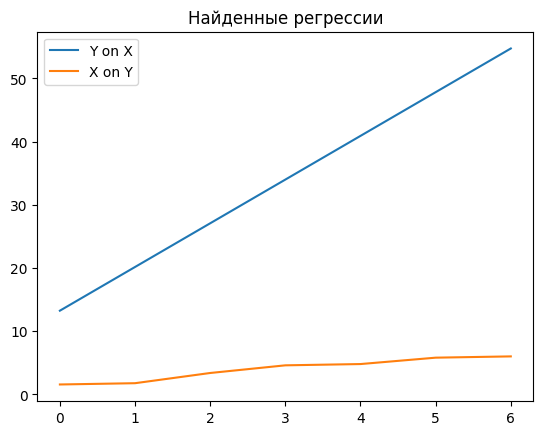

In [69]:
regressionYonX_data = [calculated_regressionYonX(X[i]) for i in range(lenDataColumns)]
regressionXonY_data = [calculated_regressionXonY(Y[i]) for i in range(lenDataColumns)]

plt.plot(regressionYonX_data, label='Y on X')
plt.plot(regressionXonY_data, label='X on Y')
plt.title('Найденные регрессии')
plt.legend()